In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score#root mean square error#metrics is used to check the performance of the algorithm
import statsmodels.api as sm

In [54]:
a=pd.read_csv('advertising.csv')
a.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [55]:
a.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [56]:
a.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [57]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [58]:
a.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [59]:
a.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [60]:
r=a['radio']
rr=r.head()
rr

0    37.8
1    39.3
2    45.9
3    41.3
4    10.8
Name: radio, dtype: float64

In [61]:
s=a['sales']
ss=s.head()
ss

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

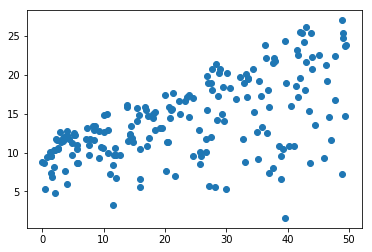

In [62]:
plt.scatter(r,s)
plt.show()

In [63]:
X = a['radio'].values.reshape(-1,1)
y = a['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.20249578339243965
9.311638095158283
The linear model is: Y = 9.3116 + 0.2025X


In [65]:
reg.score(X,y)

0.33203245544529525

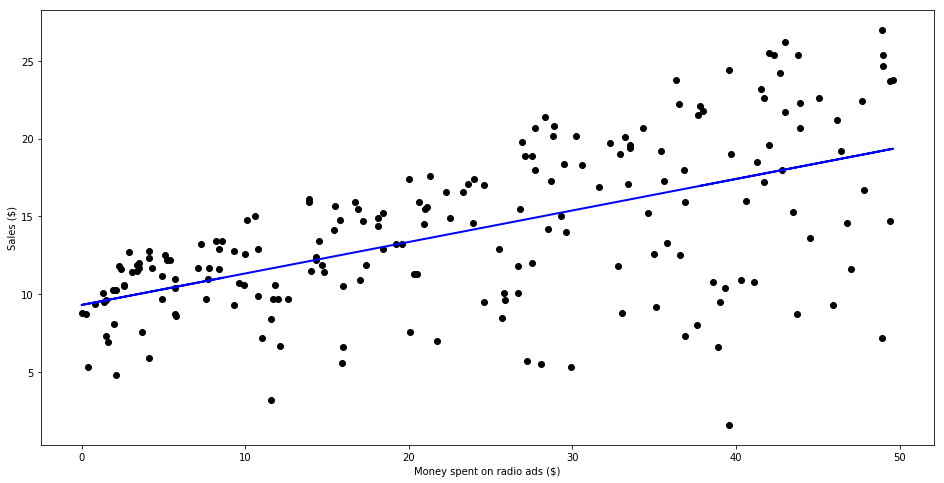

In [66]:
predictions = reg.predict(X)
#print(predictions)
plt.figure(figsize=(16, 8))
plt.scatter(
    a['radio'],
    a['sales'],
    c='black'
)
plt.plot(
    a['radio'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on radio ads ($)")
plt.ylabel("Sales ($)")
plt.show()

# TV Vs Sales

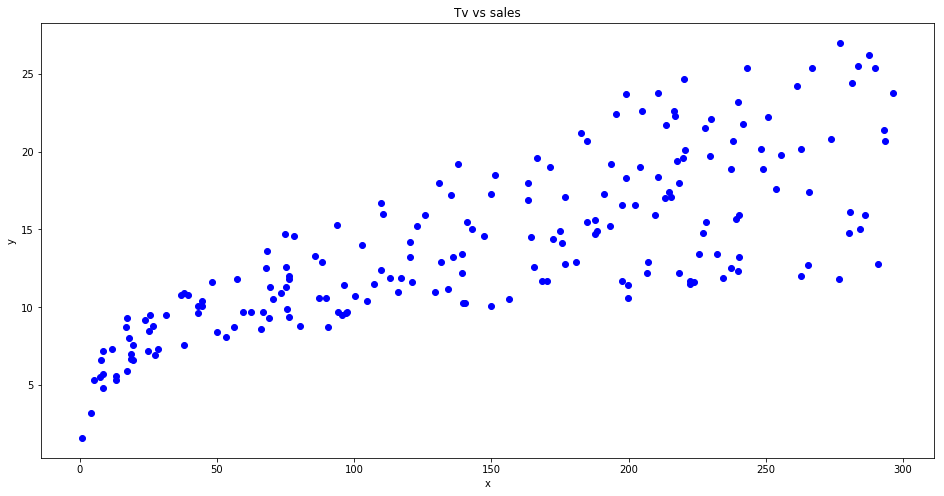

In [67]:
plt.figure(figsize=(16,8))
plt.scatter(a['TV'],a['sales'],c='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Tv vs sales")
plt.show()

In [68]:
x=a['TV'].values.reshape(-1,1)
y=a['sales'].values.reshape(-1,1)
reg=LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.04753664043301975
7.032593549127695
The linear model is: Y = 7.0326 + 0.047537X


In [70]:
reg.score(x,y)

0.611875050850071

In [71]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

[[17.97077451]
 [ 9.14797405]
 [ 7.85022376]
 [14.23439457]
 [15.62721814]
 [ 7.44616232]
 [ 9.76595037]
 [12.74649773]
 [ 7.44140866]
 [16.53041431]
 [10.17476548]
 [17.23871025]
 [ 8.16396559]
 [11.66741599]
 [16.73482186]
 [16.32125309]
 [10.25557777]
 [20.40940417]
 [10.32212907]
 [14.03474068]
 [17.41459582]
 [18.31779199]
 [ 7.6600772 ]
 [17.88520856]
 [ 9.99412625]
 [19.52997632]
 [13.82557947]
 [18.44614092]
 [18.85970969]
 [10.38868036]
 [20.95607553]
 [12.39948025]
 [11.653155  ]
 [19.65832525]
 [11.58185004]
 [20.85149492]
 [19.72012288]
 [10.58358059]
 [ 9.08142275]
 [17.87094757]
 [16.65876324]
 [15.44657891]
 [20.98935118]
 [16.86792445]
 [ 8.22576322]
 [15.35625929]
 [11.2966302 ]
 [18.43663359]
 [17.83291826]
 [10.21279479]
 [16.53041431]
 [11.80527225]
 [17.31952254]
 [15.71278409]
 [19.52046899]
 [16.48763133]
 [ 7.37961102]
 [13.50708398]
 [17.05331735]
 [17.04856369]
 [ 9.57580381]
 [19.45391769]
 [18.4081116 ]
 [11.91460652]
 [13.26464711]
 [10.31262174]
 [ 8.52999

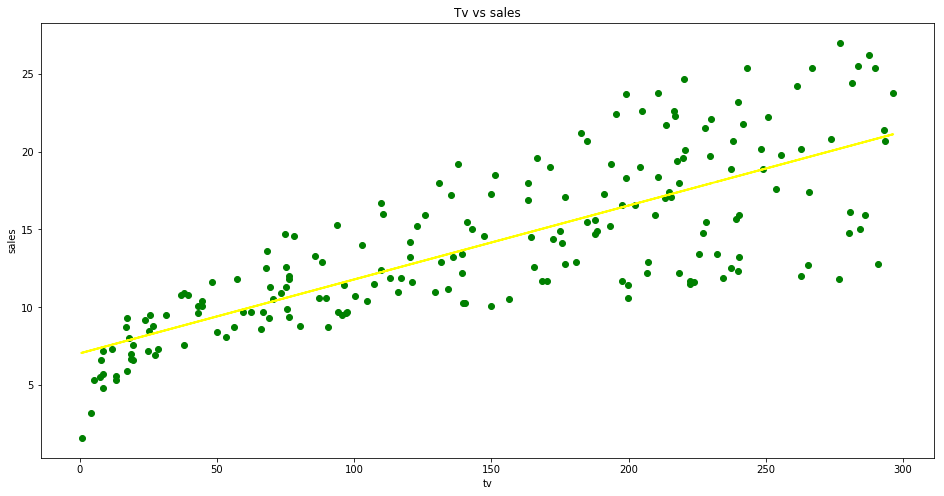

In [72]:
prediction=reg.predict(x)
print(prediction)
plt.figure(figsize=(16,8))
plt.scatter(a['TV'],a['sales'],c='green')
plt.plot(a['TV'],prediction,c='yellow',linewidth=2)
plt.xlabel('tv')
plt.ylabel('sales')
plt.title('Tv vs sales')
plt.show()

In [73]:
#r,r^2,adj r^2,ols:ordinar

In [74]:
x=np.column_stack((a['TV'],a['radio'],a['newspaper']))
y=a['sales']
x2=sm.add_constant(x)
est=sm.OLS(y,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        18:33:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0